### Importação dos dados



In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [22]:
faturamento_loja = float(loja["Preço"].sum())
faturamento_loja2 = float(loja2["Preço"].sum())
faturamento_loja3 = float(loja3["Preço"].sum())
faturamento_loja4 = float(loja4["Preço"].sum())

In [23]:
print(f"A loja 1 faturou no total R${faturamento_loja}.")
print(f"A loja 2 faturou no total R${faturamento_loja2}.")
print(f"A loja 3 faturou no total R${faturamento_loja3}.")
print(f"A loja 4 faturou no total R${faturamento_loja4}.")

A loja 1 faturou no total R$1534509.12.
A loja 2 faturou no total R$1488459.06.
A loja 3 faturou no total R$1464025.03.
A loja 4 faturou no total R$1384497.58.


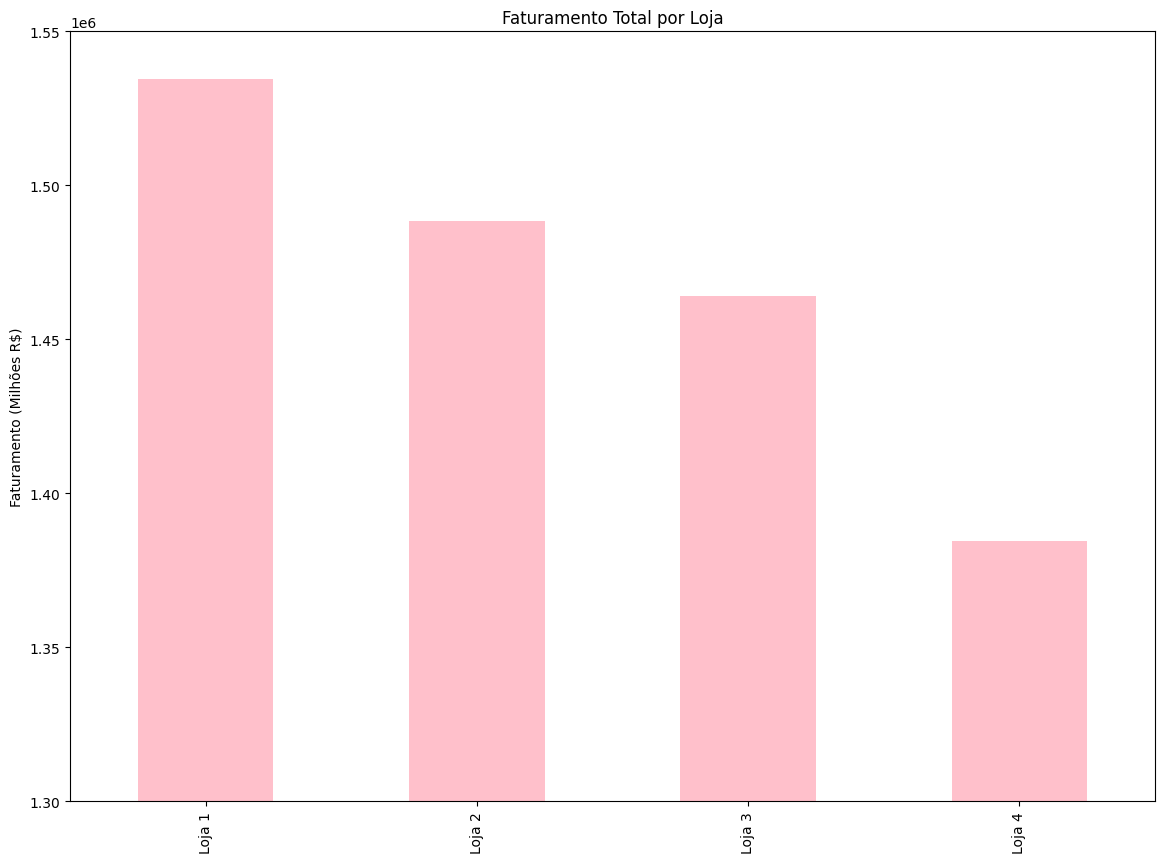

In [24]:
faturamentos_totais = {"Loja 1":faturamento_loja,"Loja 2":faturamento_loja2,"Loja 3":faturamento_loja3,"Loja 4":faturamento_loja4}
pd.Series(faturamentos_totais).plot(kind="bar", figsize=(14,10), color="pink")
plt.title('Faturamento Total por Loja')
plt.ylabel('Faturamento (Milhões R$)')
plt.ylim(1300000,1550000)
plt.show()

**A Loja 1 obteve o maior Faturamento Total.**

# 2. Vendas por Categoria

In [25]:
VendasPorCategoriaLoja = loja["Categoria do Produto"].value_counts().to_frame().sort_values("count",ascending=False)
VendasPorCategoriaLoja2 = loja2["Categoria do Produto"].value_counts().to_frame().sort_values("count",ascending=False)
VendasPorCategoriaLoja3 = loja3["Categoria do Produto"].value_counts().to_frame().sort_values("count",ascending=False)
VendasPorCategoriaLoja4 = loja4["Categoria do Produto"].value_counts().to_frame().sort_values("count",ascending=False)

In [26]:
print("Loja 1\n",VendasPorCategoriaLoja,"\n----------------")
print("Loja 2\n",VendasPorCategoriaLoja2,"\n----------------")
print("Loja 3\n",VendasPorCategoriaLoja3,"\n----------------")
print("Loja 4\n",VendasPorCategoriaLoja4,"\n----------------")

Loja 1
                        count
Categoria do Produto        
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171 
----------------
Loja 2
                        count
Categoria do Produto        
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181 
----------------
Loja 3
                        count
Categoria do Produto        
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177 
----------------
Loja 4
                        count
Categoria do Pr

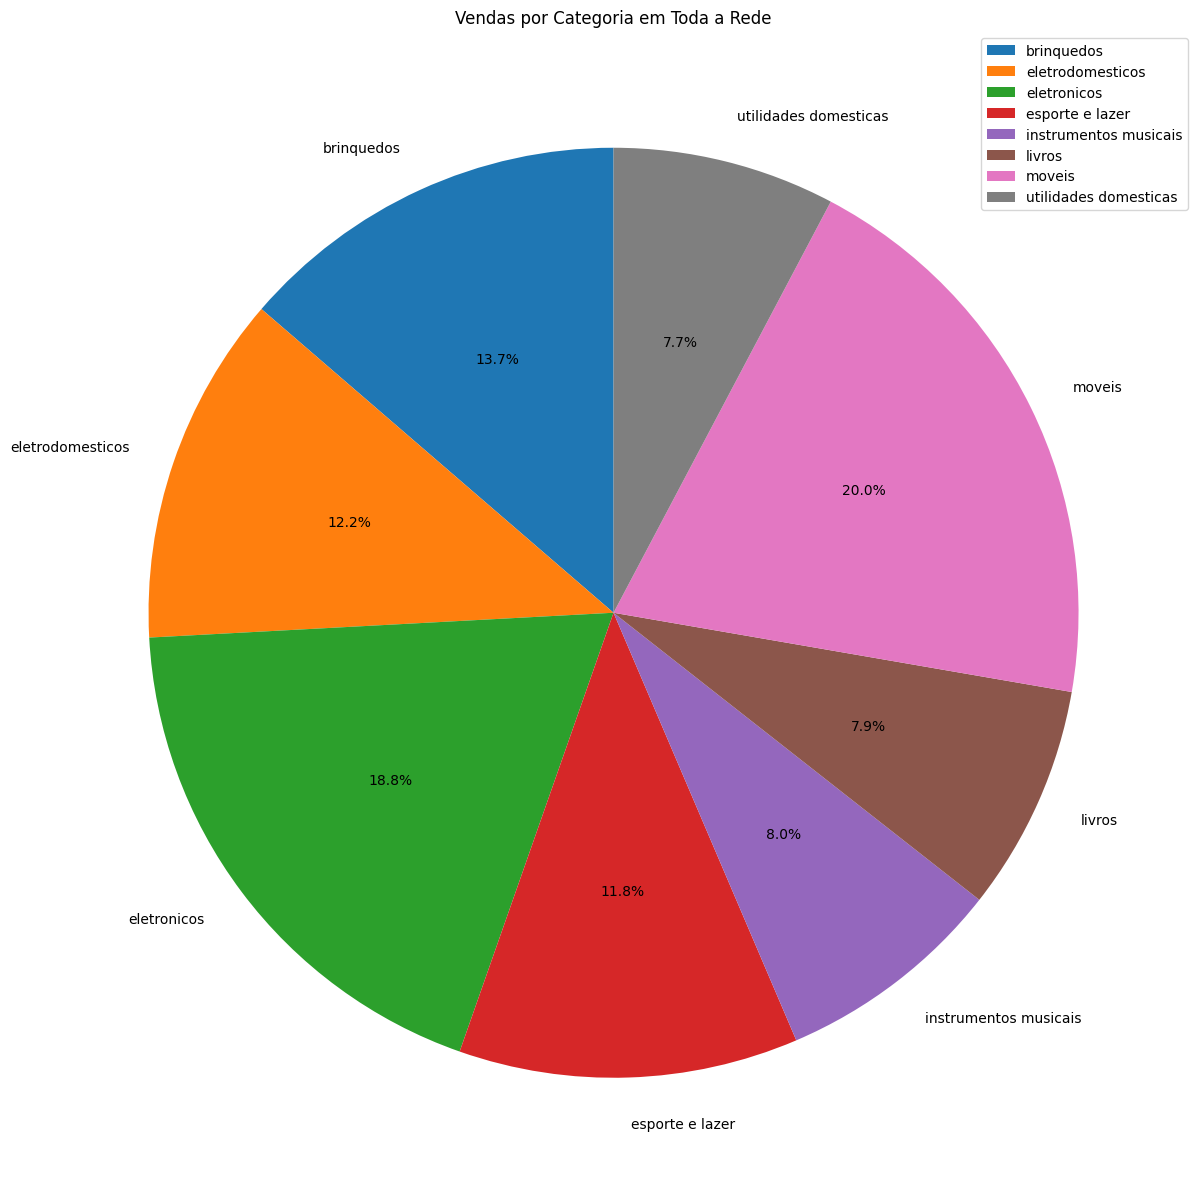

In [27]:
VendasPorCategoriaLojas = VendasPorCategoriaLoja + VendasPorCategoriaLoja2 + VendasPorCategoriaLoja3 + VendasPorCategoriaLoja4
VendasPorCategoriaLojas.plot(kind="pie", y='count', figsize=(15,16), color="purple", autopct='%1.1f%%', startangle=90)
plt.title('Vendas por Categoria em Toda a Rede')
plt.ylabel('')
plt.show()


**A categoria mais vendida nas lojas foi Móveis.E a loja que mais vendou nessa categoria foi a Loja 3**

# 3. Média de Avaliação das Lojas


In [28]:
AvaliacaoMediaLoja = round(loja["Avaliação da compra"].mean(), 2)
AvaliacaoMediaLoja2 = round(loja2["Avaliação da compra"].mean(), 2)
AvaliacaoMediaLoja3 = round(loja3["Avaliação da compra"].mean(), 2)
AvaliacaoMediaLoja4 = round(loja4["Avaliação da compra"].mean(), 2)

In [29]:
print("Avaliação Média Loja 1: ",AvaliacaoMediaLoja)
print("Avaliação Média Loja 2: ",AvaliacaoMediaLoja2)
print("Avaliação Média Loja 3: ",AvaliacaoMediaLoja3)
print("Avaliação Média Loja 4: ",AvaliacaoMediaLoja4)

Avaliação Média Loja 1:  3.98
Avaliação Média Loja 2:  4.04
Avaliação Média Loja 3:  4.05
Avaliação Média Loja 4:  4.0


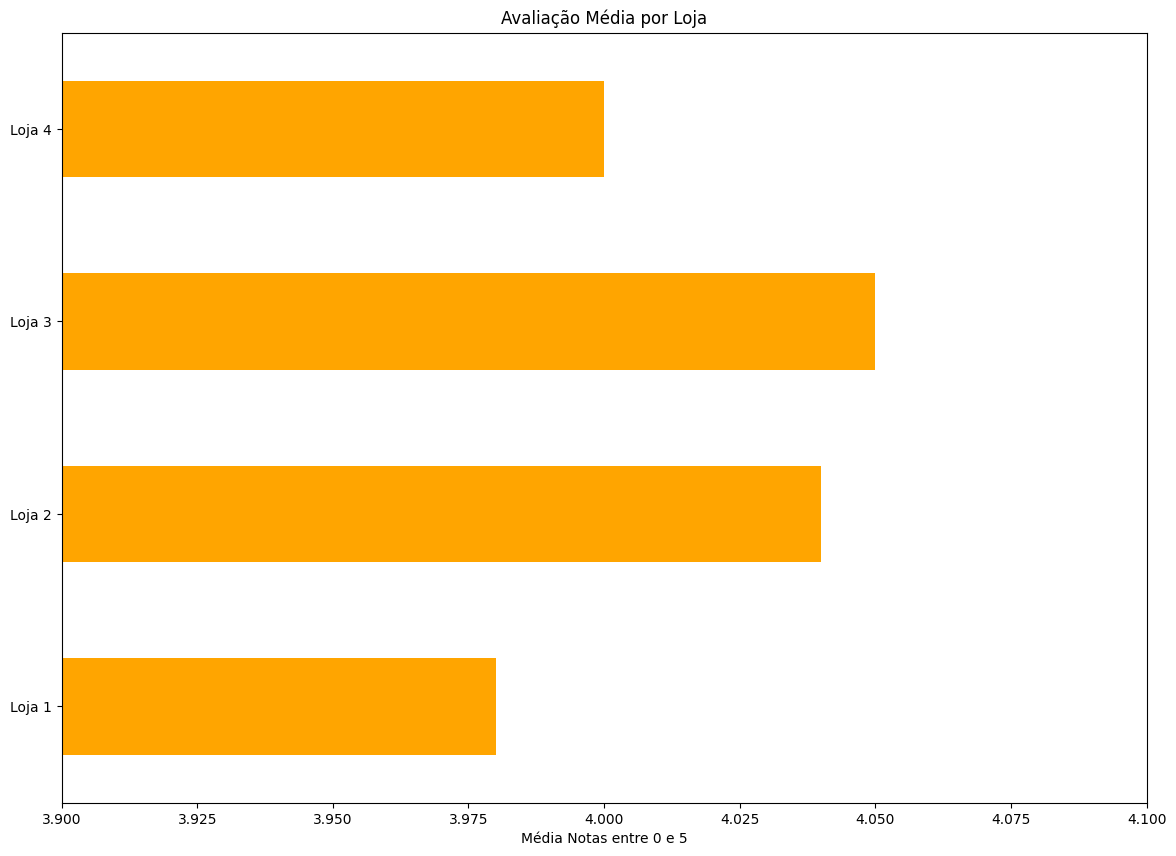

In [30]:
medias_lojas = {"Loja 1":AvaliacaoMediaLoja,"Loja 2":AvaliacaoMediaLoja2,"Loja 3":AvaliacaoMediaLoja3,"Loja 4":AvaliacaoMediaLoja4}
pd.Series(medias_lojas).plot(kind="barh", figsize=(14,10), color="orange")
plt.title('Avaliação Média por Loja')
plt.xlabel('Média Notas entre 0 e 5')
plt.xlim(3.90,4.1)
plt.show()

**A loja que obteve a melhor avaliação foi a Loja 3. Entretanto, todas as lojas obtiveram uma nota média bem próxima de 4.**

# 4. Produtos Mais e Menos Vendidos

In [31]:
MaisVendidosLoja = loja["Produto"].value_counts().to_frame().sort_values("count",ascending=False)
MaisVendidosLoja2 = loja2["Produto"].value_counts().to_frame().sort_values("count",ascending=False)
MaisVendidosLoja3 = loja3["Produto"].value_counts().to_frame().sort_values("count",ascending=False)
MaisVendidosLoja4 = loja4["Produto"].value_counts().to_frame().sort_values("count",ascending=False)

In [32]:
print("Produtos mais vendidos Loja 1\n",MaisVendidosLoja.head(5),"\n\nProdutos menos vendidos Loja 1\n",MaisVendidosLoja.tail(5),"\n----------------------------------")
print("Produtos mais vendidos Loja 2\n",MaisVendidosLoja2.head(5),"\n\nProdutos menos vendidos Loja 2\n",MaisVendidosLoja2.tail(5),"\n----------------------------------")
print("Produtos mais vendidos Loja 3\n",MaisVendidosLoja3.head(5),"\n\nProdutos menos vendidos Loja 3\n",MaisVendidosLoja3.tail(5),"\n----------------------------------")
print("Produtos mais vendidos Loja 4\n",MaisVendidosLoja4.head(5),"\n\nProdutos menos vendidos Loja 4\n",MaisVendidosLoja4.tail(5),"\n----------------------------------")

Produtos mais vendidos Loja 1
                     count
Produto                  
Micro-ondas            60
TV Led UHD 4K          60
Guarda roupas          60
Secadora de roupas     58
Cômoda                 56 

Produtos menos vendidos Loja 1
                              count
Produto                           
Ciência de dados com python     39
Pandeiro                        36
Panela de pressão               35
Headset                         33
Celular ABXY                    33 
----------------------------------
Produtos mais vendidos Loja 2
                           count
Produto                        
Iniciando em programação     65
Micro-ondas                  62
Bateria                      61
Violão                       58
Pandeiro                     58 

Produtos menos vendidos Loja 2
                    count
Produto                 
Fone de ouvido        37
Poltrona              35
Mesa de jantar        34
Impressora            34
Jogo de tabuleiro     32 
-------

# 5. Frete Médio por Loja

In [33]:
FreteMedioLoja = round(float(loja["Frete"].mean()),2)
FreteMedioLoja2 = round(float(loja2["Frete"].mean()),2)
FreteMedioLoja3 = round(float(loja3["Frete"].mean()),2)
FreteMedioLoja4 = round(float(loja4["Frete"].mean()),2)

In [34]:
print(f"O valor médio do frete da loja 1 é: R${FreteMedioLoja}")
print(f"O valor médio do frete da loja 2 é: R${FreteMedioLoja2}")
print(f"O valor médio do frete da loja 3 é: R${FreteMedioLoja3}")
print(f"O valor médio do frete da loja 4 é: R${FreteMedioLoja4}")

O valor médio do frete da loja 1 é: R$34.69
O valor médio do frete da loja 2 é: R$33.62
O valor médio do frete da loja 3 é: R$33.07
O valor médio do frete da loja 4 é: R$31.28


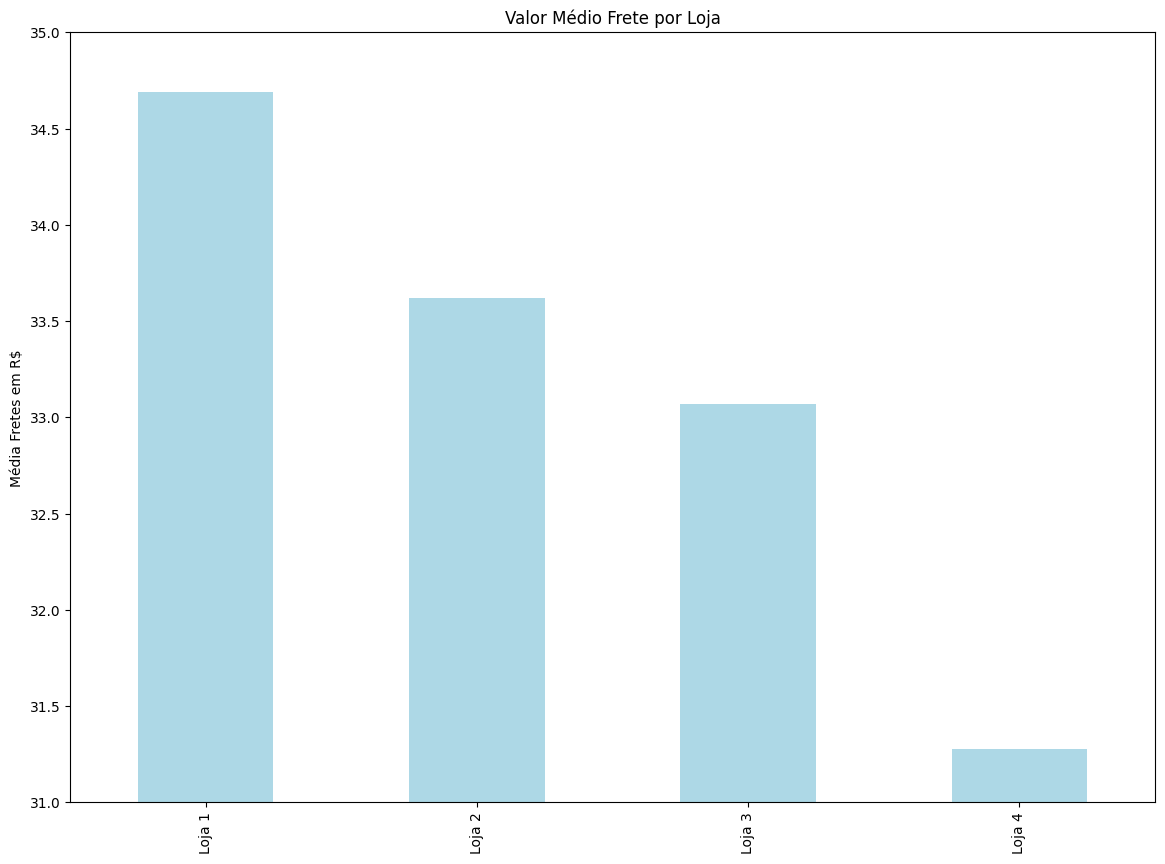

In [35]:
FreteMedioLojas = {"Loja 1":FreteMedioLoja,"Loja 2":FreteMedioLoja2,"Loja 3":FreteMedioLoja3,"Loja 4":FreteMedioLoja4}
pd.Series(FreteMedioLojas).plot(kind="bar", figsize=(14,10), color="lightblue")
plt.title('Valor Médio Frete por Loja')
plt.ylabel('Média Fretes em R$')
plt.ylim(31,35)
plt.show()

**A loja com o menor valor de frete foi a Loja 4.**

# 6. Análise de Vendas Por Região Geográfica - Matplotlib

Selecione qual loja deseja analisar ou se deseja ver todas lojas juntas.
0 - Todas as lojas.
1 - Loja 1
2 - Loja 2
3 - Loja 3
4 - Loja 4
Insira sua escolha:0


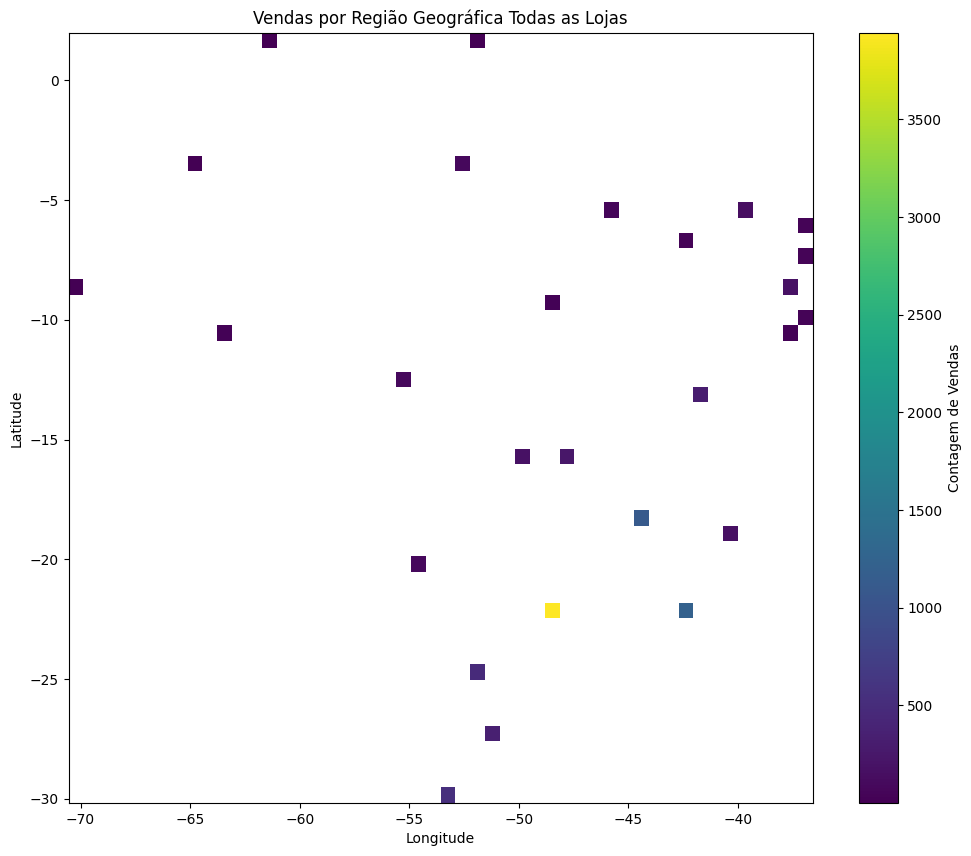

In [36]:
from enum import nonmember
try:
  lojaSelecionada = int(input("Selecione qual loja deseja analisar ou se deseja ver todas lojas juntas.\n0 - Todas as lojas.\n1 - Loja 1\n2 - Loja 2\n3 - Loja 3\n4 - Loja 4\nInsira sua escolha:"))
  if(lojaSelecionada == 0):
    selection = pd.concat([loja,loja2,loja3,loja4])
    nome = "Todas as Lojas"
  elif(lojaSelecionada == 1):
    selection = loja
    nome = "Loja 1"
  elif(lojaSelecionada == 2):
    selection = loja2
    nome = "Loja 2"
  elif(lojaSelecionada == 3):
    selection = loja3
    nome = "Loja 3"
  elif(lojaSelecionada == 4):
    selection = loja4
    nome = "Loja 4"
  else:
    raise ValueError("A opção escolhida não existe, tente novamente.")

  plt.figure(figsize=(12, 10))
  plt.hist2d(selection['lon'], selection['lat'], bins=50, cmap='viridis', cmin=1)
  plt.colorbar(label='Contagem de Vendas')
  plt.title(f'Vendas por Região Geográfica {nome}')
  plt.xlabel('Longitude')
  plt.ylabel('Latitude')
  plt.show()
except ValueError as e:
  print(e)

**Analisando os heatmaps de venda por região de cada loja, percebemos que a região com o maior número de vendas é a mesma para todas as lojas.**

# 7. Análise de Vendas Por Região Geográfica - Folium

In [42]:
try:
  lojaSelecionada = int(input("Selecione qual loja deseja analisar ou se deseja ver todas lojas juntas.\n0 - Todas as lojas.\n1 - Loja 1\n2 - Loja 2\n3 - Loja 3\n4 - Loja 4\nInsira sua escolha:"))
  if(lojaSelecionada == 0):
    selecao = pd.concat([loja,loja2,loja3,loja4])
  elif(lojaSelecionada == 1):
    selecao = loja
  elif(lojaSelecionada == 2):
    selecao = loja2
  elif(lojaSelecionada == 3):
    selecao = loja3
  elif(lojaSelecionada == 4):
    selecao = loja4
  else:
    raise ValueError("A opção escolhida não existe, tente novamente.")

  lat_media = selecao['lat'].mean()
  lon_media = selecao['lon'].mean()
  mapa_folium = folium.Map(location=[lat_media, lon_media], zoom_start=6)
  dados_heatmap = selecao[['lat', 'lon']].values.tolist()
  HeatMap(dados_heatmap).add_to(mapa_folium)
  display(mapa_folium)
except ValueError as e:
  print(e)

Selecione qual loja deseja analisar ou se deseja ver todas lojas juntas.
0 - Todas as lojas.
1 - Loja 1
2 - Loja 2
3 - Loja 3
4 - Loja 4
Insira sua escolha:00


**Analisando os gráficos de heatmap percebe-se que as vendas se concentram no estado de São Paulo para ambas as lojas.**

## Relatório Final

O objetivo de toda essa análise de dados é decidir qual das lojas será descontinuada, ou em outras palavras vendida.

Foram analizados os seguintes parâmetros para todas as lojas:

- O faturamento total das lojas.

- As categorias de produtos mais e menos vendidas.

- A média das avaliações de clientes por loja.

- Os produtos mais e menos vendidos.

- O frete médio de cada loja.

Em **faturamento total** a loja 1 se destacou das demais, enquanto a loja 4 obteve o pior resultado.

Em **categoria de produtos mais e menos** vendidos observou-se que a categoria móveis correspondeu a 20% das vendas totais somando todas as lojas.
Além disso, as lojas 3 e 4 se destacaram nesse segmento, enquanto loja 2 foi que a que menos se destacou.

Em **média das avaliações de clientes**, todas as loja tiveram um bom resultado próximo da nota 4. Mas de qualquer forma, a loja 3 obteve a maior média, enquanto a loja 1 obteve a menor média.

Em **produtos mais e menos vendidos**, foi provado o porquê do ótimo desempenho da loja 3 na categoria móveis.

Em **frete médio de cada loja**, ambas a lojas obtiveram um frete médio por volta dos R$30,00. Entretano, a loja 4 possuiu o menor valor médio, enquanto a loja 1 obteve o maior valor médio.

**Análise Final**

A loja 1 se destacou positivamente em apenas um parâmetro, o de Faturamento Total, o qual é considerado de maior importância. Entretanto, se destacou negativamente em dois parâmetros: a média das avaliações de clientes e o valor médio de frete aos consumidores, o que sugere que o frete alto pode ser um dos fatores por trás desse faturamento total.

A loja 2 não se destacou positivamente em nenhum parâmetro. Pelo contrário, se destacou negativamente na categoria de produtos mais vendidos. Nossa análise detalhada mostrou que ela teve o pior desempenho de vendas em categorias cruciais como Móveis, Eletrônicos e Brinquedos. Entretanto ainda possua um faturamento alto (o 2º maior), essa receita não é explicada pelo volume de vendas, indicando uma perda de participação de mercado e estagnação frente às outras.

A loja 3 se destacou positivamente em três parâmetros: no equilíbrio das categorias de produtos, no volume de itens vendidos e na média das avaliações de clientes. Além disso, não se destacou negativamente em nenhum parâmetro, consolidando-se como a operação mais equilibrada.

A loja 4 se destacou positivamente no frete médio (o mais eficiente) e no mix de categorias de produtos. Entretanto, se destacou negativamente no parâmetro de Faturamento Total. Contudo, seus fundamentos operacionais são melhores que os da Loja 2 para crescimento futuro.

Analisando os argumentos citados acima, é recomendado que a loja 2 seja a escolhida para ser descontinuada, visto que a mesma não apresentou diferencial competitivo em nenhum parâmetro analisado e perde em volume de vendas para lojas com faturamento menor, o que representa um risco estratégico a longo prazo.